<a href="https://colab.research.google.com/github/austineDboss/Game-project/blob/master/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 2 - Pneumonia X-ray image analysis
Neural Networks for Health Technology Applications<br>
02.02.2020, Augustine Igbinidu-Uwuigbe & Mai Vu (team 18)<br>
Metropolia University of Applied Sciences<br><br>

## Contents
<ol>
    <li>Background</li>
    <li>Data Analysis</li>
    <li>Models and Training</li>
    <li>Results</li>
    <li>Conclusions</li>
    <li>References</li>
</ol>

## 1. Background

<div style="text-align: justify">This report shows the process of handling the patients' validated Optical coherence tomography (OCT) and Chest X-Ray images collected by University of California San Diego. The goal is to classify the patients' heart disease based on available data with high accuracy using the neural network application provided by the TensorFlow library. To achieve that, it is important to deeply understand, carefully analyze the data to come up with appropriate neural network architectures. The dataset is examined as parts of data preprocessing before applying different neural network structures. The results of each model and conclusions are also mentioned in this report.
    
Dataset of validated OCT and Chest X-Ray images described and analyzed in "Deep learning-based classification and referral of treatable human diseases". The OCT Images are split into a training set and a testing set of independent patients. OCT Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.<div>

## 2. Data Analysis

In [1]:
#The below code mounts google drive folder to google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pylab inline
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Populating the interactive namespace from numpy and matplotlib


In [3]:
#setting the training and test directory containing the datasets
train_dir = "/content/drive/My Drive/colab/chest_xray/train"
test_dir = "/content/drive/My Drive/colab/chest_xray/test"
import os
os.listdir(train_dir)
os.listdir(test_dir)

['PNEUMONIA', 'NORMAL', '.DS_Store']

In [0]:
#train datagen rescaling images from values 0 - 255 and setting 30% of the dataset as validation data
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [50]:
#getting the validation,training and test data in batches from their directory and resizing the image before feeding to the model
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    shuffle = True,
                    class_mode = 'binary',
                    subset = 'training'
)
dev_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    shuffle = True,
                    class_mode = 'binary',
                    subset = 'validation'
)
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size = (150,150),
                    shuffle = False,
                    batch_size = 32,
                    class_mode = 'binary'
    
)

Found 3664 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [51]:
i = 0
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 2:
        break

Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)
Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)
Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)


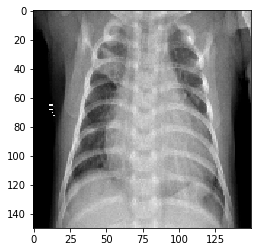

In [52]:
imshow(data_batch[0])
show()

In [53]:
labels_batch

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
      dtype=float32)

In [54]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)             

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr= 1e-5),
              metrics = ['acc'])

In [0]:
#loading saved model_weights
model.load_weights('/content/drive/My Drive/colab/case_2_run_1.h5')

In [0]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 1,
            epochs = 80,
            validation_data = dev_generator,
            validation_steps = 10)
model.save('/content/drive/My Drive/colab/case_2_run_1.h5')

In [0]:
predicted = model.predict(test_generator) #Run the model to predict the test set
predicted = (predicted > 0.5).astype(int).flatten()

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted, test_generator.labels).T)
print(classification_report(predicted, test_generator.labels))

[[125 109]
 [  8 382]]
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       133
           1       0.98      0.78      0.87       491

    accuracy                           0.81       624
   macro avg       0.76      0.86      0.77       624
weighted avg       0.88      0.81      0.83       624



In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

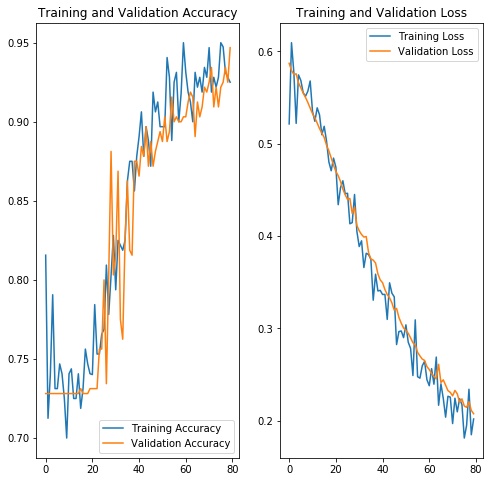

In [61]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [0]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-05),
              metrics = ['acc'])

In [0]:
model1.load_weights('/content/drive/My Drive/colab/case_2_run_2.h5')

In [0]:
history1 = model1.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 1,
            epochs = 50,
            validation_data = dev_generator,
            validation_steps = 10)
model1.save('/content/drive/My Drive/colab/case_2_run_2.h5')

In [0]:
predicted1 = model1.predict(test_generator) #Run the model with the test set
predicted1 = (predicted1 > 0.5).astype(int).flatten()

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted1, test_generator.labels).T)
print(classification_report(predicted1, test_generator.labels))

[[125 109]
 [ 13 377]]
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       138
           1       0.97      0.78      0.86       486

    accuracy                           0.80       624
   macro avg       0.75      0.84      0.77       624
weighted avg       0.87      0.80      0.82       624



In [0]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))

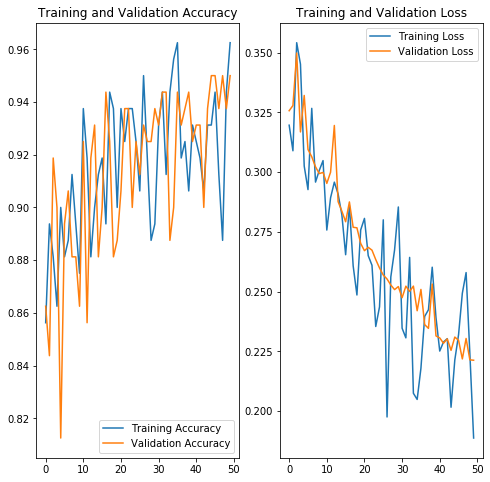

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
#From the graph above the training and validation accuracy fluctuation is really high. So changing the batch_size was a considered solution for this.
#T